# PrefixLLM: LLM-aided Prefix Circuit Design

Prefix circuits are fundamental components in digital adders, widely used in digital systems due to their efficiency in calculating carry signals. Synthesizing prefix circuits with minimized area and delay is crucial for enhancing the performance of modern computing systems. Recently, large language models (LLMs) have demonstrated a surprising ability to perform text generation tasks. We propose PrefixLLM, that leverages LLMs for prefix circuit synthesis. PrefixLLM transforms the prefix circuit synthesis task into a structured text generation problem, termed the Structured Prefix Circuit Representation (SPCR), and introduces an iterative framework to automatically and accurately generate valid SPCRs. Furthermore, we present a design space exploration (DSE) framework that uses LLMs to iteratively search for area and delay optimized prefix circuits. To further improve synthesis quality, we develop two enhancement techniques: simplification of prompt for SPCR generation, and a structural optimization heuristic. With these enhancements, PrefixLLM enables a general, non-reasoning LLM to achieve the same or even better performance as a powerful reasoning LLM, significantly reducing the deployment cost.

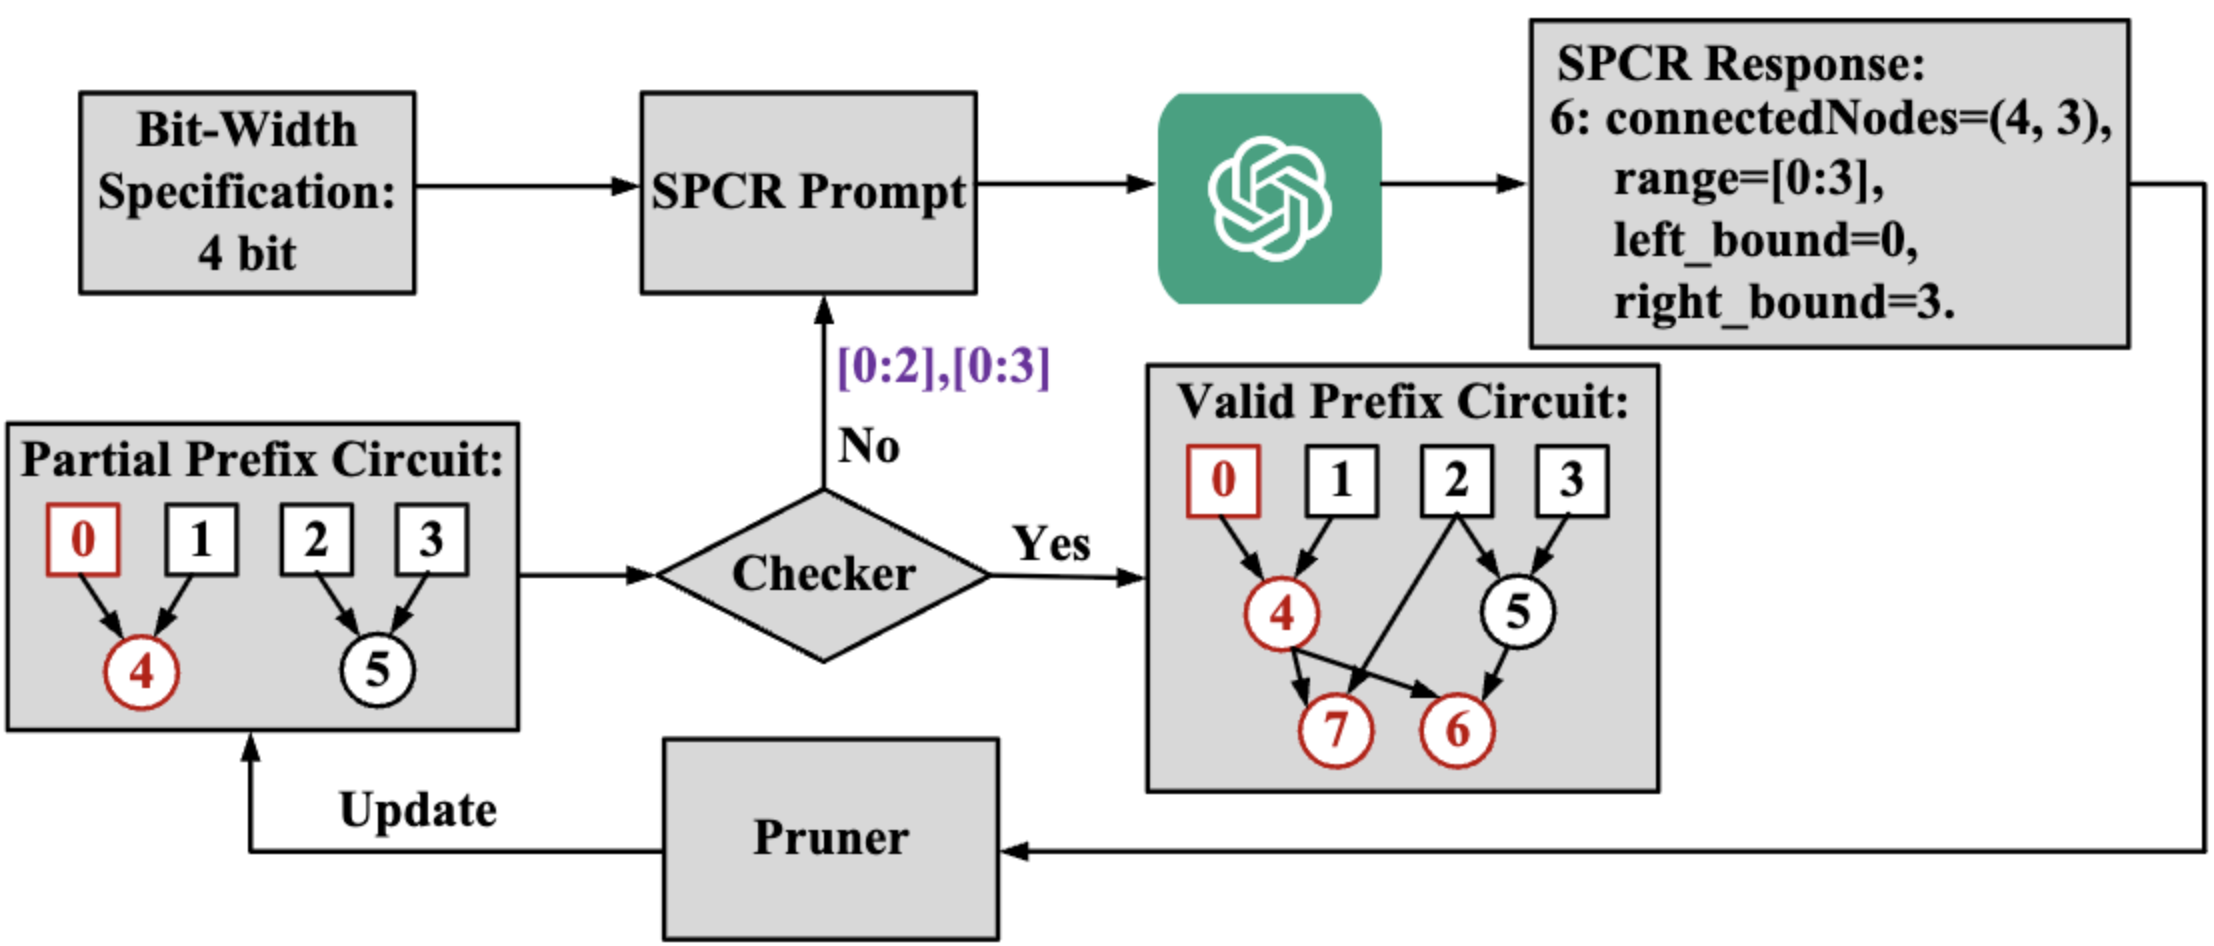

## Requirements

In [1]:
!git clone https://github.com/FCHXWH823/PrefixGPT.git

Cloning into 'PrefixGPT'...
remote: Enumerating objects: 1216, done.
remote: Counting objects: 100% (1216/1216), done.
remote: Compressing objects: 100% (221/221), done.
remote: Total 1216 (delta 1057), reused 1133 (delta 990), pack-reused 0 (from 0)
Receiving objects: 100% (1216/1216), 3.42 MiB | 3.96 MiB/s, done.
Resolving deltas: 100% (1057/1057), done.


In [8]:
!pip install openai
!pip install matplotlib
!pip install networkx
!pip install nxpd

  Preparing metadata (setup.py) ... done
  Created wheel for nxpd: filename=nxpd-0.2.0-py3-none-any.whl size=28297 sha256=17bc75002ab969865c23ddc4a49a8533af45cbd45bbbbb31b12388e180bfeb80
  Stored in directory: /root/.cache/pip/wheels/2f/49/d2/e685dd70cb5ac5536f909d6ade9adfcfcc695c224e201b4bf4
Successfully built nxpd


Edit Config.yml:

(i) For the first version of our PrefixLLM (`USE_HUMAN_HEURISTIC`=0), only powerful reasoning LLMs can generate efficient prefix circuits, e.g., o1 and o1-mini. If selecting other general models such as gpt 4o, you may have to increase `Spcr_It_Bound` and `Dse_It_Bound`.
    
(ii) For the current version of our PrefixLLM (`USE_HUMAN_HEURISTIC`=1), it supports general chatting LLMs to generate great prefix circuits, e.g., deepseek-V3.
  ```
  Openai_API_Key -> your openai api key
  DeepSeek_API_Key-> your deepseek api key
  Model_Name -> selected openai model name (find your preferred model from OpenAI (https://platform.openai.com/docs/models), DeepSeek (https://www.deepseek.com/), ...)
  Level -> level limitation of prefix circuit
  BitWidth -> bit width of prefix circuit
  Spcr_It_Bound: the iteration bound of genrating a valid SPCR
  Dse_It_Bound: the iteration bound of our design exploration framework
  USE_HUMAN_HEURISTIC: if set as 1, use our proposed enhanced techniques; else, our initial version of PrefixLLM
  ```


## Run

Src files:

  ```bash
  PrefixCircuit.py -> Data structure definition of prefix circuit
  GeneratePrefixGPT_DepthLimit.py -> PrefixLLM methodology
  GenerateVerilog.py -> verilog generation script
  ```

Before running, please delete folder GPTPrefixBitWidth_LLevel_Model_Name_Pruned_USE_HUMAN_HEURISTIC.

In [ ]:
!cd PrefixGPT/ && python GeneratePrefixGPT_DepthLimit.py

0: connectedNodes=(None, None), range=[0:0], left_bound=0, right_bound=0, level=1.
1: connectedNodes=(None, None), range=[1:1], left_bound=1, right_bound=1, level=1.
2: connectedNodes=(None, None), range=[2:2], left_bound=2, right_bound=2, level=1.
3: connectedNodes=(None, None), range=[3:3], left_bound=3, right_bound=3, level=1.
4: connectedNodes=(None, None), range=[4:4], left_bound=4, right_bound=4, level=1.
5: connectedNodes=(None, None), range=[5:5], left_bound=5, right_bound=5, level=1.
6: connectedNodes=(None, None), range=[6:6], left_bound=6, right_bound=6, level=1.
7: connectedNodes=(None, None), range=[7:7], left_bound=7, right_bound=7, level=1.
8: connectedNodes=(None, None), range=[8:8], left_bound=8, right_bound=8, level=1.
9: connectedNodes=(None, None), range=[9:9], left_bound=9, right_bound=9, level=1.
10: connectedNodes=(None, None), range=[10:10], left_bound=10, right_bound=10, level=1.
11: connectedNodes=(None, None), range=[11:11], left_bound=11, right_bound=11, lev

Outputs:

Structured Prefix Circuit Representation of the generated prefix circuit in each DSE iteration is stored in folder GPTPrefix`BitWidth`_L`Level`_`Model_Name`_Pruned_`USE_HUMAN_HEURISTIC`. The area of each of them can be checked in GPTPrefix`BitWidth`_L`Level`_`Model_Name`_Pruned_`USE_HUMAN_HEURISTIC`_Pruned.txt.





Post-processing using `GenerateVerilog.py`:

Generate the corresponding verilog file for each prefix circuit (SPCR) stored in GPTPrefix`BitWidth`_L`Level`_`Model_Name`_Pruned_`USE_HUMAN_HEURISTIC`_Pruned.txt.

Edit `GenerateVerilog.py`:


1.   `bit_width`
2.   `level_limitation`
3.   `model_name`
4.   `use_heuristic`

Generated verilog files are stored in folder GPTPrefix`BitWidth`_L`Level`_`Model_Name`_Pruned_`USE_HUMAN_HEURISTIC`.



In [12]:
!cd PrefixGPT/ && python GenerateVerilog.py